<a href="https://colab.research.google.com/github/rachel1234561/DS-2002/blob/main/Rachel_sqliteHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER NOT NULL,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

In [3]:
students_data = [
    ("Alice", "Johnson"),
    ("Bob", "Smith"),
    ("Carol", "White"),
    ("David", "Brown"),
    ("Eve", "Davis")
]

grades_data = [
    (1, "Math", 95),
    (1, "English", 88),
    (1, "History", 90),
    (2, "Math", 82),
    (2, "English", 76),
    (2, "History", 70),
    (3, "Math", 98),
    (3, "English", 92),
    (3, "History", 88),
    (4, "Math", 85),
    (4, "English", 80),
    (4, "History", 78),
    (5, "Math", 90),
    (5, "English", 85),
    (5, "History", 82)
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

In [13]:
#1. Retrieve all students' names and their grades.
# AI prompt: show all the grades in the same line

#sql query
cursor.execute('''
SELECT students.first_name, students.last_name, GROUP_CONCAT(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

# Fetch and display the results
name_grade_data = cursor.fetchall()

for row in name_grade_data:
    print(row)

('Alice', 'Johnson', '95,88,90')
('Bob', 'Smith', '82,76,70')
('Carol', 'White', '98,92,88')
('David', 'Brown', '85,80,78')
('Eve', 'Davis', '90,85,82')


In [14]:
#2. Find the average grade for each student

#sql query
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')

# Fetch and display the results
avg_grade_data = cursor.fetchall()

for row in avg_grade_data:
    print(row)


('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 76.0)
('Carol', 'White', 92.66666666666667)
('David', 'Brown', 81.0)
('Eve', 'Davis', 85.66666666666667)


In [19]:
#3. Find the student with the highest average grade.

#sql query
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
''')

# Fetch and display the results
highest_avg_grade_data = cursor.fetchall()

for row in highest_avg_grade_data:
    print(row)


('Carol', 'White', 92.66666666666667)


In [20]:
# 4. Find the average grade for the Math subject.

#sql query
cursor.execute('''
SELECT AVG(grade)
FROM grades
WHERE subject = 'Math'
''')

# Fetch and display the results
avg_math_grade_data = cursor.fetchall()

for row in avg_math_grade_data:
    print(row)


(90.0,)


In [23]:
# 5. List all students who scored above 90 in any subject.

#sql query
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

# Fetch and display the results
above_90_data = cursor.fetchall()

for row in above_90_data:
    print(row)


('Alice', 'Johnson')
('Carol', 'White')


In [28]:
#1. Use Pandas to load the data from the students and grades tables into DataFrames.

import pandas as pd
# Query the sales data into a DataFrame
df_students = pd.read_sql_query('SELECT * FROM students', connection)

# Display the DataFrame
df_students.head()

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [29]:
# Query the sales data into a DataFrame
df_grades = pd.read_sql_query('SELECT * FROM grades', connection)

# Display the DataFrame
df_grades.head()

,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


In [30]:
#2. Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade.
df_combined = pd.read_sql_query('''
    SELECT
        students.first_name,
        students.last_name,
        grades.subject,
        grades.grade
    FROM students
    JOIN grades ON students.student_id = grades.student_id
''', connection)

# Display the DataFrame
print(df_combined)


   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     70
6       Carol     White     Math     98
7       Carol     White  English     92
8       Carol     White  History     88
9       David     Brown     Math     85
10      David     Brown  English     80
11      David     Brown  History     78
12        Eve     Davis     Math     90
13        Eve     Davis  English     85
14        Eve     Davis  History     82


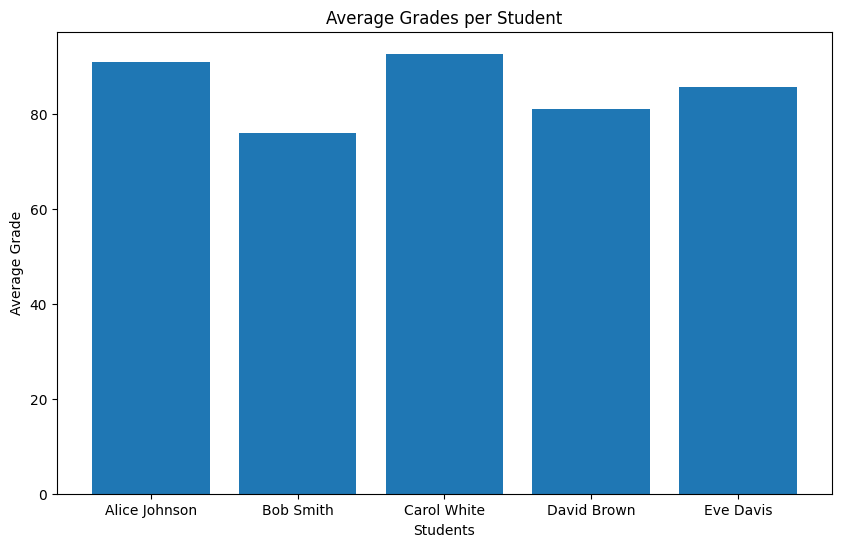

In [41]:
#3. Visualize the data with Matplotlib:

# AI prompt: Plot the average grades for each student.

import matplotlib.pyplot as plt
# Calculate average grades for each student
avg_grades_by_student = df_combined.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

# Plot the average grades for each student
plt.figure(figsize=(10, 6))
plt.bar(avg_grades_by_student['first_name'] + " " + avg_grades_by_student['last_name'], avg_grades_by_student['grade'])
plt.xlabel("Students")
plt.ylabel("Average Grade")
plt.title("Average Grades per Student")
plt.show()

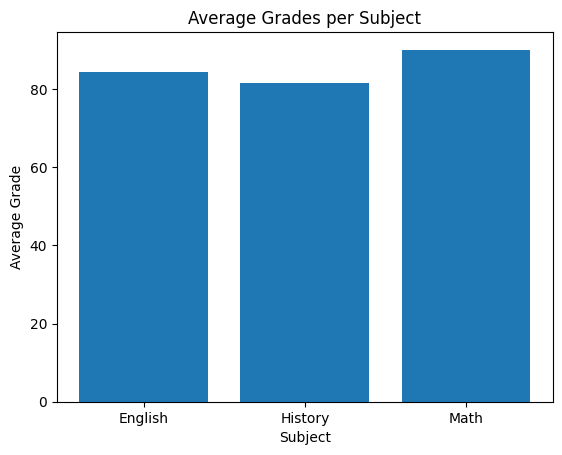

In [53]:
#Create a bar chart showing the average grade for each subject.
avg_grades_by_subject = df_grades.groupby(['subject'])['grade'].mean().reset_index()
plt.bar(avg_grades_by_subject['subject'] , avg_grades_by_subject['grade'])
plt.xlabel("Subject")
plt.ylabel("Average Grade")
plt.title("Average Grades per Subject")
plt.show()


In [55]:
#bonus questions
#Implement a query that finds the student with the highest grade in each subject.
#sql query
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE (grades.subject, grades.grade)
IN (SELECT subject, MAX(grade)
    FROM grades
    GROUP BY subject)
''')

# Fetch and display the results
highest_grade_data = cursor.fetchall()

for row in highest_grade_data:
    print(row)

#I couldn't figure out how to do the grouped bar chart

('Alice', 'Johnson', 'History', 90)
('Carol', 'White', 'Math', 98)
('Carol', 'White', 'English', 92)
